<a href="https://colab.research.google.com/github/ShaliniR8/lahman-mlb/blob/main/pitching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture 
!wget https://github.com/ShaliniR8/lahman-mlb/raw/main/baseballdatabank_2022.zip
!unzip baseballdatabank_2022.zip 

In [ ]:
path = '/content/baseballdatabank-2022.2/core/'

In [ ]:
import pandas as pd
pitching = pd.read_csv( path + "Pitching.csv")
teams = pd.read_csv( path + "Teams.csv")
people = pd.read_csv( path + 'People.csv')

In [ ]:
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49430 entries, 0 to 49429
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  49430 non-null  object 
 1   yearID    49430 non-null  int64  
 2   stint     49430 non-null  int64  
 3   teamID    49430 non-null  object 
 4   lgID      49298 non-null  object 
 5   W         49430 non-null  int64  
 6   L         49430 non-null  int64  
 7   G         49430 non-null  int64  
 8   GS        49430 non-null  int64  
 9   CG        49430 non-null  int64  
 10  SHO       49430 non-null  int64  
 11  SV        49430 non-null  int64  
 12  IPouts    49430 non-null  int64  
 13  H         49430 non-null  int64  
 14  ER        49430 non-null  int64  
 15  HR        49430 non-null  int64  
 16  BB        49430 non-null  int64  
 17  SO        49430 non-null  int64  
 18  BAOpp     44989 non-null  float64
 19  ERA       49333 non-null  float64
 20  IBB       34852 non-null  fl

In [ ]:
# drop columns not needed
drop = ['lgID']
pitching = pitching.drop(columns = drop)

In [ ]:
pitching.shape

(49430, 29)

In [ ]:
# get stats from previous year than the one being predicted
join = ['teamID', 'playerID']
pitching_join_outer = pd.merge(pitching, pitching, how = 'outer', left_on=join, right_on=join)

In [ ]:
pitching_join_outer.shape

(191732, 56)

In [ ]:
curr_year = pitching_join_outer['yearID_x']
prev_year = pitching_join_outer['yearID_y']
pitching_join_prev_year = pitching_join_outer[curr_year == prev_year + 1]

In [ ]:
pitching_join_prev_year[['playerID', 'teamID', 'yearID_x', 'yearID_y', 'W_x', 'W_y']].head()

,playerID,teamID,yearID_x,yearID_y,W_x,W_y
6,brainas01,WS3,1872,1871,2,12
19,mcbridi01,PH1,1872,1871,30,18
25,mcbridi01,PH1,1873,1872,24,30
31,mcbridi01,PH1,1874,1873,33,24
37,mcbridi01,PH1,1875,1874,44,33


In [ ]:
cols_left = [ col for col in pitching_join_prev_year.columns.to_list() if '_x' in col ]
cols_left.remove('yearID_x')
pitching_join_prev_year = pitching_join_prev_year.drop(columns = cols_left)

In [ ]:
pitching_join_prev_year.head()

,playerID,yearID_x,teamID,yearID_y,stint_y,W_y,L_y,G_y,GS_y,CG_y,...,IBB_y,WP_y,HBP_y,BK_y,BFP_y,GF_y,R_y,SH_y,SF_y,GIDP_y
6,brainas01,1872,WS3,1871,1,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
19,mcbridi01,1872,PH1,1871,1,18,5,25,25,25,...,NaN,3,NaN,0,1059.0,0,223,NaN,NaN,NaN
25,mcbridi01,1873,PH1,1872,1,30,14,47,47,47,...,NaN,10,NaN,0,1944.0,0,349,NaN,NaN,NaN
31,mcbridi01,1874,PH1,1873,1,24,19,46,46,38,...,NaN,9,NaN,0,1778.0,0,325,NaN,NaN,NaN
37,mcbridi01,1875,PH1,1874,1,33,22,55,55,55,...,NaN,9,NaN,0,2171.0,0,344,NaN,NaN,NaN


In [ ]:
birthYear = people[['playerID', 'birthYear']]
pitching_join_prev_year = pd.merge(pitching_join_prev_year, birthYear, left_on = ['playerID'], right_on = ['playerID'])
pitching_join_prev_year.head()

,playerID,yearID_x,teamID,yearID_y,stint_y,W_y,L_y,G_y,GS_y,CG_y,...,WP_y,HBP_y,BK_y,BFP_y,GF_y,R_y,SH_y,SF_y,GIDP_y,birthYear
0,brainas01,1872,WS3,1871,1,12,15,30,30,30,...,7,NaN,0,1291.0,0,292,NaN,NaN,NaN,1841.0
1,brainas01,1874,BL1,1873,1,5,7,14,14,12,...,3,NaN,0,568.0,0,139,NaN,NaN,NaN,1841.0
2,mcbridi01,1872,PH1,1871,1,18,5,25,25,25,...,3,NaN,0,1059.0,0,223,NaN,NaN,NaN,1847.0
3,mcbridi01,1873,PH1,1872,1,30,14,47,47,47,...,10,NaN,0,1944.0,0,349,NaN,NaN,NaN,1847.0
4,mcbridi01,1874,PH1,1873,1,24,19,46,46,38,...,9,NaN,0,1778.0,0,325,NaN,NaN,NaN,1847.0


In [ ]:
pitching_join_prev_year['pitcherAge'] = (pitching_join_prev_year['yearID_x'] - pitching_join_prev_year['birthYear'])
pitching_join_prev_year = pitching_join_prev_year.drop(columns = ['birthYear'])
pitching_join_prev_year.head() 

,playerID,yearID_x,teamID,yearID_y,stint_y,W_y,L_y,G_y,GS_y,CG_y,...,WP_y,HBP_y,BK_y,BFP_y,GF_y,R_y,SH_y,SF_y,GIDP_y,pitcherAge
0,brainas01,1872,WS3,1871,1,12,15,30,30,30,...,7,NaN,0,1291.0,0,292,NaN,NaN,NaN,31.0
1,brainas01,1874,BL1,1873,1,5,7,14,14,12,...,3,NaN,0,568.0,0,139,NaN,NaN,NaN,33.0
2,mcbridi01,1872,PH1,1871,1,18,5,25,25,25,...,3,NaN,0,1059.0,0,223,NaN,NaN,NaN,25.0
3,mcbridi01,1873,PH1,1872,1,30,14,47,47,47,...,10,NaN,0,1944.0,0,349,NaN,NaN,NaN,26.0
4,mcbridi01,1874,PH1,1873,1,24,19,46,46,38,...,9,NaN,0,1778.0,0,325,NaN,NaN,NaN,27.0


In [ ]:
cols = pitching_join_prev_year.columns.to_list()
cols.remove('playerID')
cols.remove('yearID_y')
cols.remove('teamID')
cols.remove('yearID_x')
avgs = pitching_join_prev_year.groupby(['teamID', 'yearID_x'])[cols].mean().reset_index()
medians = pitching_join_prev_year.groupby(['teamID', 'yearID_x'])[cols].median().reset_index()

In [ ]:
# teams_o = teams

In [ ]:
teams = teams_o

In [ ]:
teams = teams[['yearID', 'teamID', 'W', 'L']].copy()
win_perc = teams['W'] / (teams['W'] + teams['L'])
teams['win_perc']  = win_perc
teams = teams.drop(columns = ['W', 'L'])

In [ ]:
teams = teams[teams['yearID'] > min(teams['yearID'])]

In [ ]:
avgs.sort_values(by='yearID_x').head()

,teamID,yearID_x,stint_y,W_y,L_y,G_y,GS_y,CG_y,SHO_y,SV_y,...,WP_y,HBP_y,BK_y,BFP_y,GF_y,R_y,SH_y,SF_y,GIDP_y,pitcherAge
370,BS1,1872,1.0,10.0,5.0,20.0,15.5,11.0,0.5,1.5,...,7.0,NaN,0.0,692.0,4.5,151.5,NaN,NaN,NaN,29.5
2815,WS3,1872,1.0,12.0,15.0,30.0,30.0,30.0,0.0,0.0,...,7.0,NaN,0.0,1291.0,0.0,292.0,NaN,NaN,NaN,31.0
1904,PH1,1872,1.0,18.0,5.0,25.0,25.0,25.0,0.0,0.0,...,3.0,NaN,0.0,1059.0,0.0,223.0,NaN,NaN,NaN,25.0
878,CL1,1872,1.0,5.0,9.5,17.5,14.5,11.5,0.0,0.0,...,25.0,NaN,0.0,638.5,3.0,170.5,NaN,NaN,NaN,25.5
295,BR2,1873,1.0,9.0,28.0,37.0,37.0,37.0,0.0,0.0,...,26.0,NaN,1.0,1762.0,0.0,473.0,NaN,NaN,NaN,NaN


In [ ]:
teamPitcherAvgs = pd.merge(teams, avgs, left_on = ['yearID', 'teamID'], right_on = ['yearID_x', 'teamID'])
teamPitcherAvgs = teamPitcherAvgs.drop(columns = ['yearID_x'])
teamPitcherMeds = pd.merge(teams, medians, left_on = ['yearID', 'teamID'], right_on = ['yearID_x', 'teamID'])
teamPitcherMeds = teamPitcherMeds.drop(columns = ['yearID_x'])

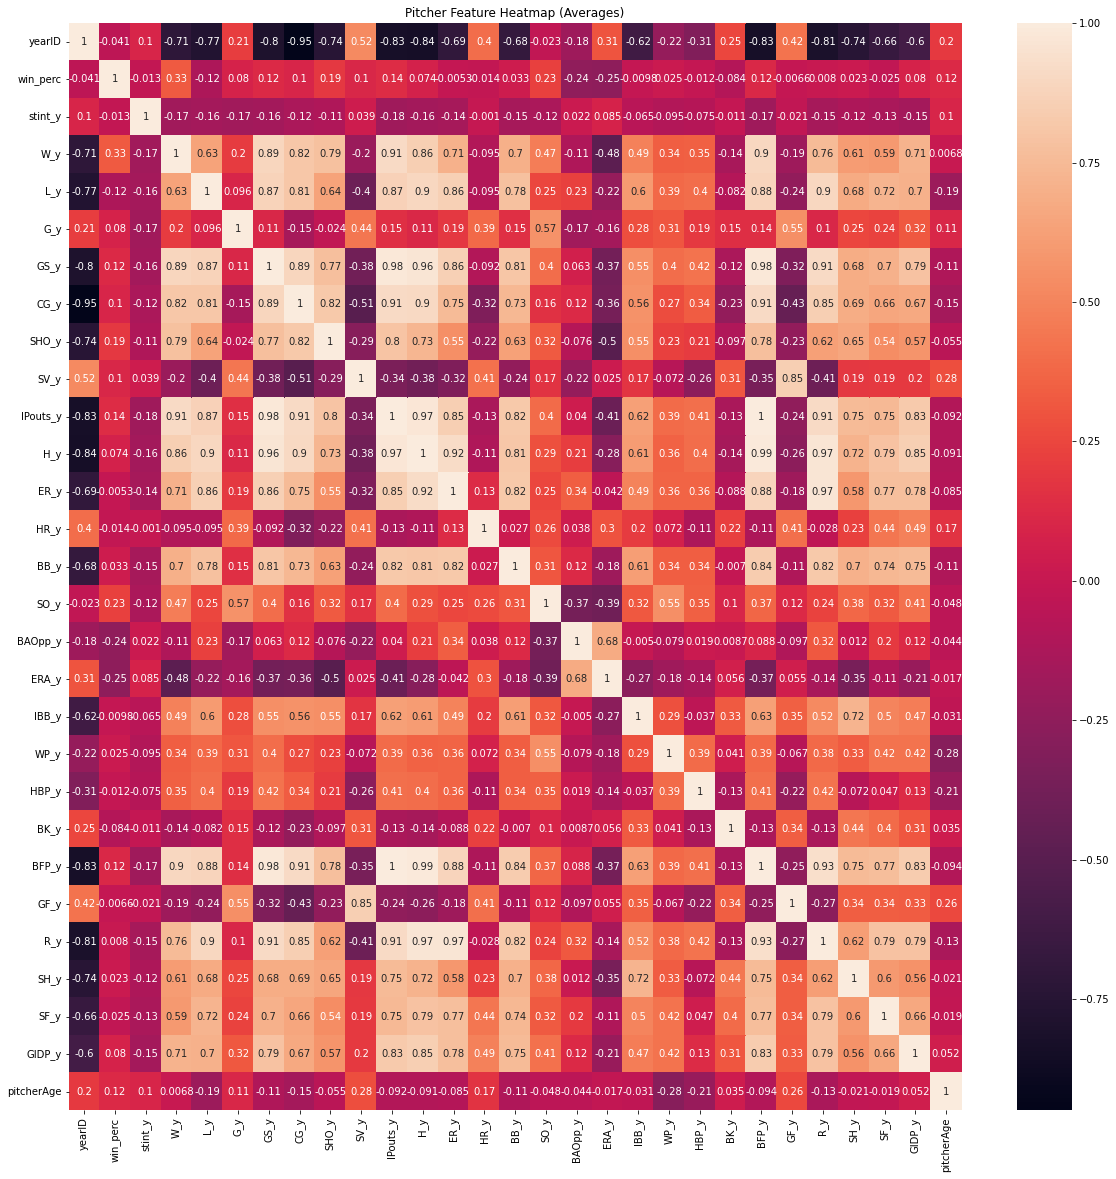

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 20))
sns.heatmap(teamPitcherAvgs.corr(method = 'spearman'), annot=True)
plt.title('Pitcher Feature Heatmap (Averages)')
plt.savefig('fig1.jpg')
plt.show()

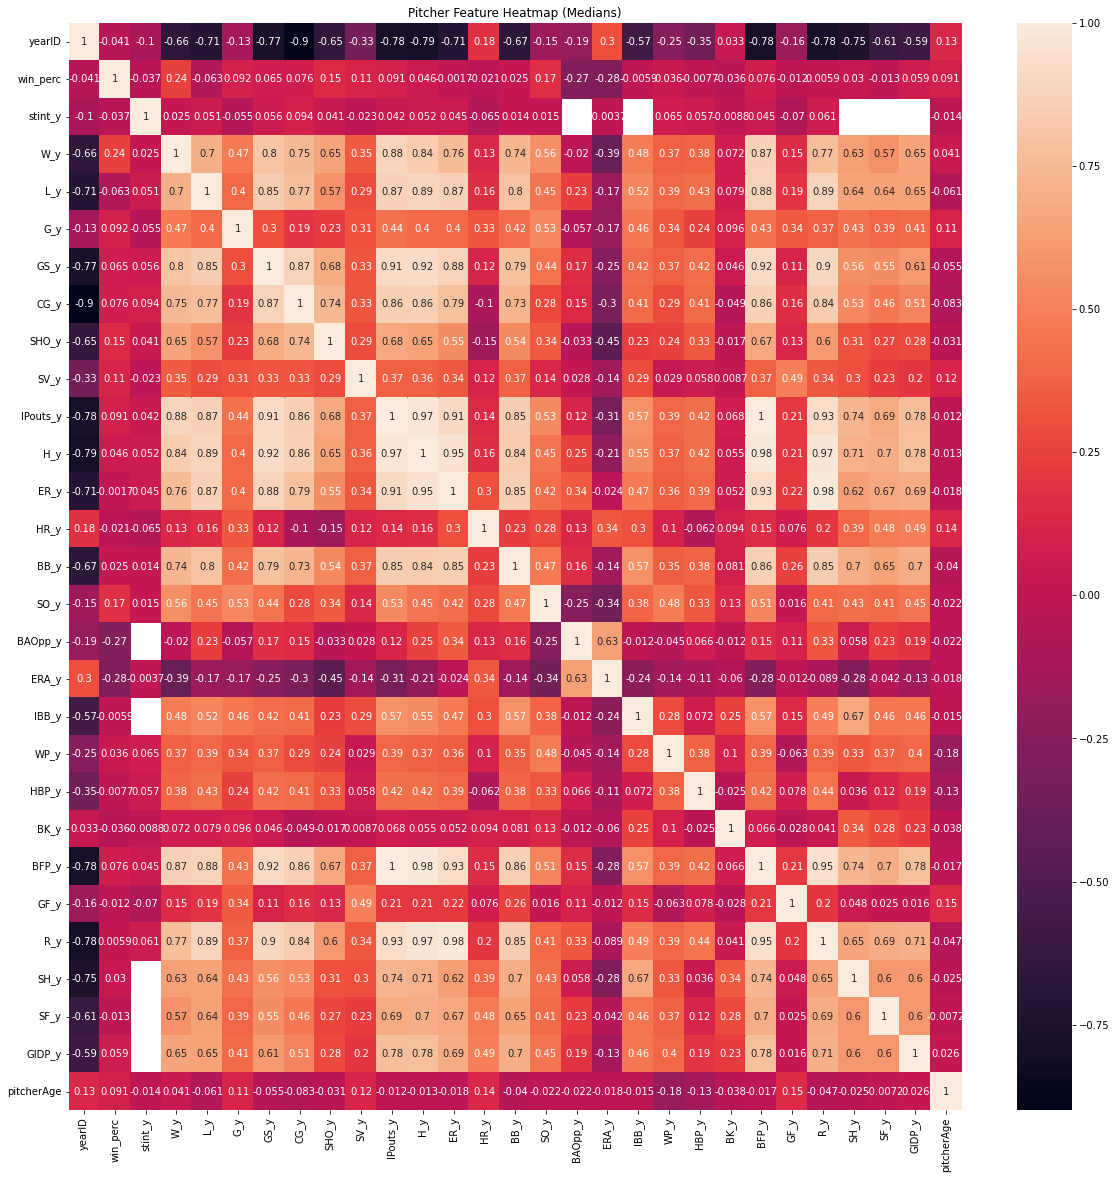

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(teamPitcherMeds.corr(method = 'spearman'), annot=True)
plt.title('Pitcher Feature Heatmap (Medians)')
plt.savefig('fig2.jpg')
plt.show()